<a href="https://colab.research.google.com/github/lis55/stockPrediction/blob/main/stockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla Stocks price prediction


---

The following is an implementation of 2 different methods for Tesla stocks price prediction: 

1) LSTM

2) Running average

The first step is to import the necessary libraries and loading the data from the csv file into a dataframe. In the output cell, the head and bottom of dataframe are displayed. 


In [52]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
data = pd.read_csv('stock_prices.csv')
data

,Date,Open,High,Low,Close,Volume
0,2013-01-02,7.000000,7.090000,6.942000,7.072000,5974000
1,2013-01-03,7.036000,7.090000,6.950000,6.954000,3710000
2,2013-01-04,6.960000,6.960000,6.784000,6.880000,3370000
3,2013-01-07,6.960000,6.960000,6.780000,6.868000,2210000
4,2013-01-08,6.900000,6.900000,6.622000,6.736000,6420000
...,...,...,...,...,...,...
2133,2021-06-23,632.000000,657.200012,630.039978,656.570007,31099200
2134,2021-06-24,674.989990,697.619995,667.609985,679.820007,45982400
2135,2021-06-25,689.580017,693.809998,668.700012,671.869995,32496700
2136,2021-06-28,671.640015,694.700012,670.320007,688.719971,21628200


We will focus on predicting the "close" variable. The input consists of 16 times steps to predict the closing price of at the next time step (day). The data is normalized. I used 5 LSTM layers of 50 units. The training set consists of the the closing price values  without the last 14 days that will be included in the test set.



In [53]:
features_array = data[['Open','High','Low','Close','Volume']]
#Reescaling the data
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(features_array)

X_train = []
X_test = []
y_train = []
y_test = []
n_past = 14
n_future = 14
for i in range(n_past, 2139):
    if i<(2138-n_future):
      X_train.append(training_set_scaled[i-n_past:i, 3])
      X_test.append(training_set_scaled[i-n_past:i, 3])
      y_train.append(training_set_scaled[i:(i+n_future), 3])
    else:
      X_test.append(training_set_scaled[i-n_past:i, 3])

X_train, y_train, X_test = np.array(X_train), np.array(y_train),np.array(X_test)
X_train.shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(y_train.shape)
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 14))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)


(2110, 14, 1)
(2110, 14)
Epoch 1/200
66/66 [==============================] - 7s 9ms/step - loss: 0.0211
Epoch 2/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 3/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0035
Epoch 4/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0031
Epoch 5/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 6/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 7/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 8/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 9/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 10/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 11/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 12/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 13/200

(2125, 14)
(2125, 14, 1)
(2110, 14)


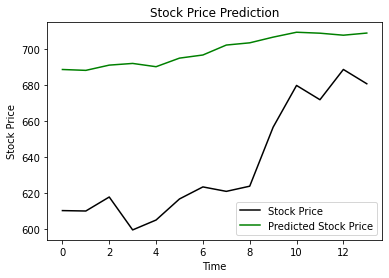

(29750, 1)
(2125, 14, 1)
(2138,)
4577.264


In [54]:

inputs = features_array['Close'].values
inputs = inputs.reshape(-1,1)
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(inputs)
'''inputs = sc.transform(inputs)
X_test = []
for i in range(n_past, 2124):
    X_test.append(inputs[i-n_past:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))'''
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price.shape)
print(X_test.shape)
print(y_train.shape)
predicted_stock_price = predicted_stock_price.reshape(-1,1)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(features_array['Close'].values[-14:], color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price[-14:], color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

print(predicted_stock_price.shape)
print(X_test.shape)
print(features_array['Close'].values.shape)

model_metric = tf.keras.metrics.MeanSquaredError()
model_metric.update_state(predicted_stock_price[-14:], features_array['Close'].values[-14:])
print(model_metric.result().numpy())




Epoch 1/200
66/66 [==============================] - 6s 9ms/step - loss: 0.0142
Epoch 2/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 3/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 4/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 5/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 6/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 7/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 8/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 9/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 10/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 11/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 12/200
66/66 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 13/200
66/66 [=================

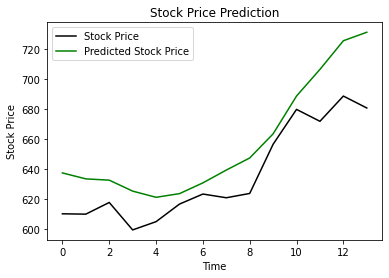

622.30066


In [55]:
X_train_plus = []
X_test_plus = []

for i in range(n_past, 2139):
    if i<(2138-n_future):
      X_train_plus.append(training_set_scaled[i-n_past:i, 1]+training_set_scaled[i-n_past:i, 2]/2)
      X_test_plus.append(training_set_scaled[i-n_past:i, 1]+training_set_scaled[i-n_past:i, 2]/2)
    else:
      X_test_plus.append(training_set_scaled[i-n_past:i, 1]+training_set_scaled[i-n_past:i, 2]/2)

X_train_plus, X_test_plus = np.array(X_train_plus),np.array(X_test_plus)

X_train_plus = np.reshape(X_train_plus, (X_train_plus.shape[0], X_train_plus.shape[1], 1))
X_test_plus = np.reshape(X_test_plus, (X_test_plus.shape[0], X_test_plus.shape[1], 1))

X_train2 = np.concatenate((X_train,X_train_plus),axis=2)
X_test2 = np.concatenate((X_test,X_test_plus),axis=2)

regressor2 = Sequential()

regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train2.shape[1], X_train2.shape[2])))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))

regressor2.add(Dense(units = 1))

regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor2
regressor2.fit(X_train2, y_train, epochs = 200, batch_size = 32)

predicted_stock_price = regressor2.predict(X_test2)
predicted_stock_price = predicted_stock_price.reshape(-1,1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(features_array['Close'].values[-14:], color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price[-14:], color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
model2_metric = tf.keras.metrics.MeanSquaredError()
model2_metric.update_state(predicted_stock_price[-14:], features_array['Close'].values[-14:])
print(model2_metric.result().numpy())



The next steps is to prepare the test set which includes the last 14 days to be predicted. As with the training set, the data is normalized. In order to visualize the data, the inverse scaling is applied and the prediction and labels are plotted as seen bellow


# Moving average

---
The second approach is the running average.



2126
(2138,)


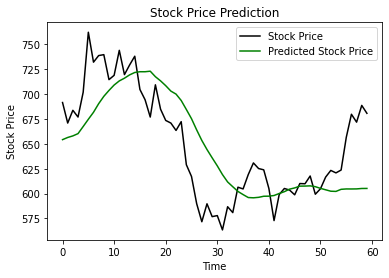

In [130]:

N = 14
cumsum, moving_aves = [0], []

for i, x in enumerate(features_array['Close'].values[:-N], 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
      moving_ave = (cumsum[i] - cumsum[i-N])/N
      moving_aves.append(moving_ave)
i=0
while i<=N:
  cumsum.append(cumsum[-1] + moving_aves[-1])
  moving_ave = (cumsum[-1] - cumsum[-1-N])/N
  moving_aves.append(moving_ave)
  i+=1

print(len(moving_aves))
print(features_array['Close'].values.shape)

moving_aves = np.array(moving_aves)
plt.plot(features_array['Close'].values[-60:], color = 'black', label = 'Stock Price')
moving_aves = moving_aves.reshape(-1,)
plt.plot(moving_aves[-60:], color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [131]:
import tensorflow as tf
m1 = tf.keras.metrics.MeanSquaredError()
m2 = tf.keras.metrics.MeanSquaredError()
m2.update_state(moving_aves[-14:], features_array['Close'].values[-14:])
print(m2.result().numpy())
m1.update_state(predicted_stock_price[-14:], features_array['Close'].values[-14:])
print(m1.result().numpy())





1931.5232
622.30066


References

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html


https://www.kaggle.com/sohier/tutorial-accessing-data-with-pandas


https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html
